In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Multiplication

In [2]:
sess = tf.Session()
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
y = tf.mul(a,b)

In [7]:
print(sess.run(y, feed_dict={a:1, b:2}))

2.0


# Simple linear regression

## Train artificial data generation

In [8]:
num_sample =20
X_trn = np.linspace(0,1,num_sample)
Weight = 2 
Bias = -1.0
noise_level = 0.1
Y_true = X_trn * Weight + Bias
Y_trn = Y_true + np.random.randn(*X_trn.shape)*noise_level

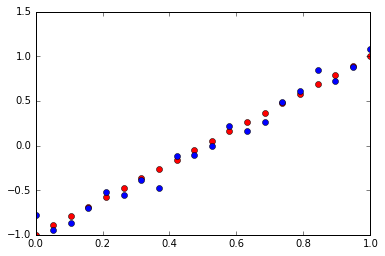

In [9]:
plt.figure(1)
plt.plot(X_trn, Y_true, "ro", label="True data")
plt.plot(X_trn, Y_trn, "bo", label="Training data")

## Making the model 

In [10]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
W = tf.Variable(0.0)
b = tf.Variable(0.0)
Y_model = tf.mul(X,W) + b

In [11]:
# Loss function : 오차의 제곱합 평균
loss = tf.reduce_mean(tf.square(Y - Y_model))

In [12]:
train_op = tf.train.AdagradOptimizer(learning_rate=0.1).minimize(loss)

In [14]:
sess.run(tf.initialize_all_variables())
for i in range(1000):
    sess.run(train_op, feed_dict={X: X_trn, Y: Y_trn})
    if i % 100 == 0:
        print("Weight: {:0.4f}, Bias: {:0.4f}".format(*sess.run([W,b])))
        print("loss: {:0.4f}".format(sess.run(loss, feed_dict={X:X_trn, Y:Y_trn})))

Weight: 0.0753, Bias: -0.0062
loss: 0.3575
Weight: 1.4076, Bias: -0.7072
loss: 0.0432
Weight: 1.7579, Bias: -0.8861
loss: 0.0153
Weight: 1.9035, Bias: -0.9604
loss: 0.0103
Weight: 1.9665, Bias: -0.9925
loss: 0.0094
Weight: 1.9940, Bias: -1.0065
loss: 0.0092
Weight: 2.0059, Bias: -1.0126
loss: 0.0092
Weight: 2.0112, Bias: -1.0153
loss: 0.0092
Weight: 2.0134, Bias: -1.0165
loss: 0.0092
Weight: 2.0144, Bias: -1.0170
loss: 0.0092


In [15]:
W, b = sess.run([W, b])

In [16]:
sess.close()

In [18]:
Y_pred = np.dot(X_trn, W) + b
print(Y_pred)

[-1.01717734 -0.91113196 -0.80508658 -0.69904119 -0.59299581 -0.48695042
 -0.38090504 -0.27485965 -0.16881427 -0.06276889  0.0432765   0.14932188
  0.25536727  0.36141265  0.46745803  0.57350342  0.6795488   0.78559419
  0.89163957  0.99768496]


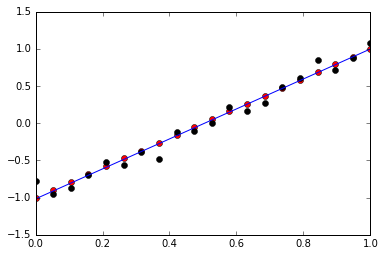

In [19]:
plt.figure(2)
plt.plot(X_trn, Y_true, "ro", label="True data")
plt.plot(X_trn, Y_trn, "ko", label="Training data")
plt.plot(X_trn, Y_pred, "b-", label="Prediction")
plt.show()